<a href="https://colab.research.google.com/github/Terryanda/Machine-Learning/blob/main/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
# Load the dataset

file_path = '/content/Social_Network_Ads.csv'  # Adjust path if needed
data = pd.read_csv(file_path)

In [16]:
# Inspecting the first few rows of the dataset
print(data.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [17]:
# Preprocessing the data (Assuming 'Age' and 'EstimatedSalary' are features and 'Purchased' is the target)

X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

In [18]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
# Feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Logistic Regression Model

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
# Predicting the test set results

y_pred_log_reg = log_reg.predict(X_test)

In [25]:
# Evaluate Logistic Regression model

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("Confusion Matrix for Logistic Regression:")
print(cm_log_reg)
print(f"Accuracy for Logistic Regression: {accuracy_log_reg * 100:.2f}%")

Confusion Matrix for Logistic Regression:
[[65  3]
 [ 8 24]]
Accuracy for Logistic Regression: 89.00%


In [26]:
# K-Nearest Neighbors Model

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# Function to plot the decision boundary

def plot_decision_boundary(X, y, model, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

<ipython-input-27-bea4ebe8d568>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


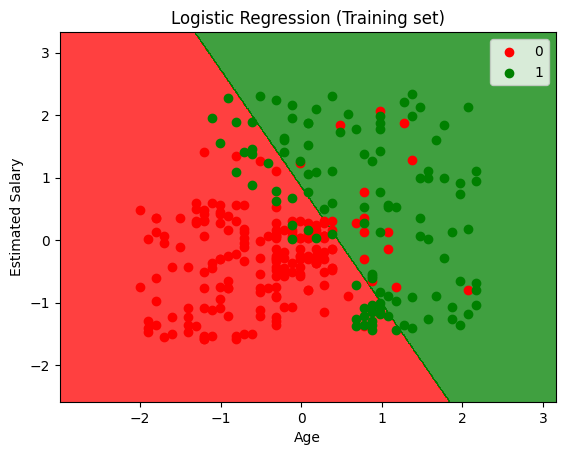

In [28]:
# Visualizing the Logistic Regression results (Training set)

plot_decision_boundary(X_train, y_train, log_reg, 'Logistic Regression (Training set)')

<ipython-input-27-bea4ebe8d568>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


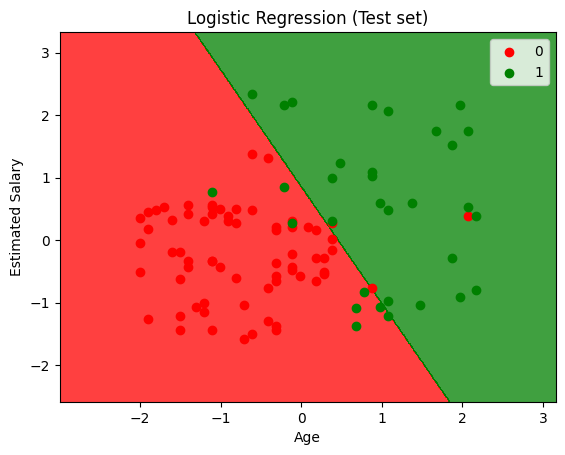

In [29]:
# Visualizing the Logistic Regression results (Test set)

plot_decision_boundary(X_test, y_test, log_reg, 'Logistic Regression (Test set)')

<ipython-input-27-bea4ebe8d568>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


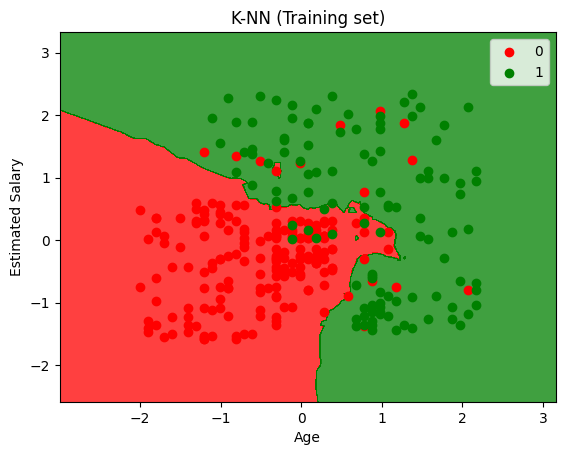

In [30]:
# Visualizing the K-NN results (Training set)

plot_decision_boundary(X_train, y_train, knn, 'K-NN (Training set)')

<ipython-input-27-bea4ebe8d568>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


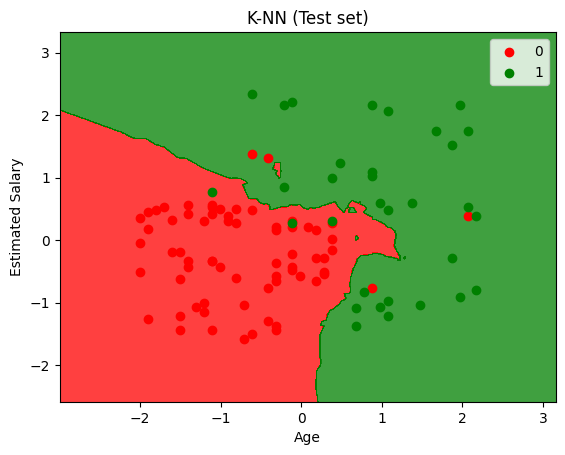

In [31]:
# Visualizing the K-NN results (Test set)

plot_decision_boundary(X_test, y_test, knn, 'K-NN (Test set)')